# **Hadamard Gate & measurement**

## Drawing & Measurment 

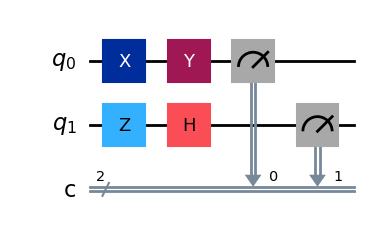

In [15]:
from qiskit import *

qc= QuantumCircuit(2,2) #(Q,C) Q: number of qubits / C: number of classic bits

qc.x(0) 
qc.y(0) 
qc.z(1)
qc.h(1) #Hadamard gate
#we store the qubits in classical bit so we could access each result later
qc.measure(0,0) #the q0 be measured and stored in the 0th bit
qc.measure(1,1) #the q1 be measured and stored in the 1st bit
qc.draw() #drawing

qc.draw('mpl') #enhancing the drawing with matplotlib

## Getting the classical result

In [16]:
from qiskit_aer import Aer
from qiskit_textbook.tools import array_to_latex

# we use statevector_simulator to see the wavefunction (exact quantum state) but we use AerSimulator() to simulate real measurements and results like from an actual quantum computer.

#running the circuit (exact quantum states)
backend = Aer.get_backend('statevector_simulator')
job = backend.run(qc) #the old version: out=execure(qc,backend)
result = job.result()

#getting some features:

#statevectorS
statevector = result.get_statevector() #gives what basisvecor* amplitude are in the result / they are in this order : (00, 01, 10, 11).
array_to_latex(statevector,pretext="\\text{Statevector}= ") #better representation than print("statevector: ",statevector)


print()
#measurement results
counts = result.get_counts() #the result is always backward of the circuits e.g. 01 = 0 for 2nd qubit & 1 for 1st qubit
print("result vectors and probability: ",counts) #e.g. result:{'01':1,0} this means the 1st qubit result is 1 and 2nd is 0 and this whole result is given by the probability of 1


<IPython.core.display.Math object>


result vectors and probability:  {'10': 1}


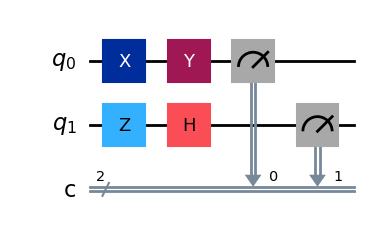

In [17]:
from qiskit import *

qc= QuantumCircuit(2,2) #(Q,C) Q: number of qubits / C: number of classic bits

qc.x(0) 
qc.y(0) 
qc.z(1)
qc.h(1) #Hadamard gate
#we store the qubits in classical bit so we could access each result later
qc.measure(0,0) #the q0 be measured and stored in the 0th bit
qc.measure(1,1) #the q1 be measured and stored in the 1st bit
qc.draw() #drawing

qc.draw('mpl') #enhancing the drawing with matplotlib

## Simulating the result

In [18]:
#running the circuit (real measurements)
from qiskit_aer import AerSimulator

simulator = AerSimulator()
compiledcircuit =transpile(qc, simulator) 
compiledcircuit.measure_all() 
result = simulator.run(compiledcircuit , shots=1000).result() #shots is the number of times the circut should be run

counts = result.get_counts()

print("statevector: ",statevector)
print()
print("result vectors and probability: ",counts) 



statevector:  Statevector([0.+0.j, 0.+0.j, 0.-1.j, 0.+0.j],
            dims=(2, 2))

result vectors and probability:  {'00 00': 519, '10 10': 481}
